学习R语言{DataExplorer}包。

In [10]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
library(nycflights13)
library(DataExplorer)

In [12]:

 merge_airlines <- merge(
  flights, airlines,
  by = "carrier",
  all.x = TRUE
)

merge_planes <- merge(
  merge_airlines,
  planes,
  by = "tailnum",
  all.x = TRUE,
  suffixes = c("_flights", "_planes")
)

merge_airports_origin <- merge(
  merge_planes,
  airports,
  by.x = "origin",
  by.y = "faa",
  all.x = TRUE,
  suffixes = c("_carrier", "_origin")
)

final_data <- merge(
  merge_airports_origin,
  airports,
  by.x = "dest",
  by.y = "faa",
  all.x = TRUE,
  suffixes = c("_origin", "_dest")
)

glimpse(final_data)

Rows: 336,776
Columns: 42
$ dest           <chr> "ABQ", "ABQ", "ABQ", "ABQ", "ABQ", "ABQ", "ABQ", "ABQ",~
$ origin         <chr> "JFK", "JFK", "JFK", "JFK", "JFK", "JFK", "JFK", "JFK",~
$ tailnum        <chr> "N651JB", "N607JB", "N519JB", "N608JB", "N566JB", "N552~
$ carrier        <chr> "B6", "B6", "B6", "B6", "B6", "B6", "B6", "B6", "B6", "~
$ year_flights   <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2~
$ month          <int> 5, 10, 12, 5, 12, 8, 7, 7, 5, 8, 10, 6, 10, 11, 4, 6, 9~
$ day            <int> 14, 29, 19, 30, 7, 25, 12, 1, 15, 26, 7, 22, 20, 19, 30~
$ dep_time       <int> 1958, 1956, 2102, 1957, 1959, 1959, 2005, 2016, 1958, 2~
$ sched_dep_time <int> 2001, 2000, 2001, 2001, 2001, 2007, 2007, 2007, 2001, 2~
$ dep_delay      <dbl> -3, -4, 61, -4, -2, -8, -2, 9, -3, 29, 1, -1, -3, -4, 0~
$ arr_time       <int> 2210, 2251, 2358, 2248, 2357, 2204, 2214, 2239, 2234, 2~
$ sched_arr_time <int> 2308, 2303, 2304, 2308, 2304, 2259, 2259, 2259, 2308, 2~
$ arr_delay   

In [13]:
introduce(final_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
336776,42,16,26,0,809170,906,14144592,97254656


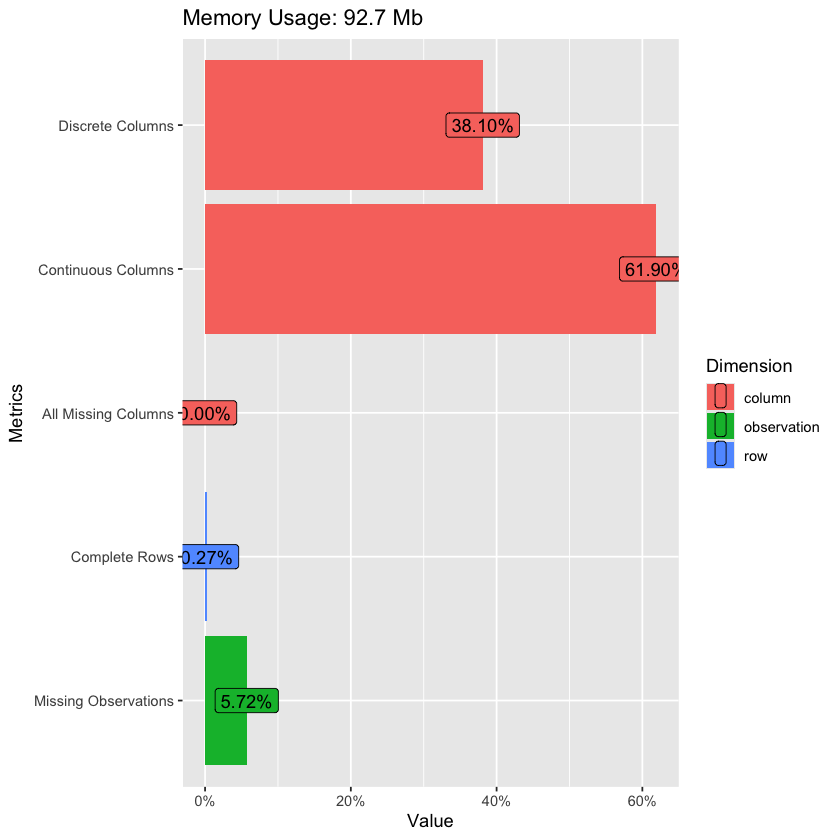

In [14]:
plot_intro(final_data)

# 缺失值

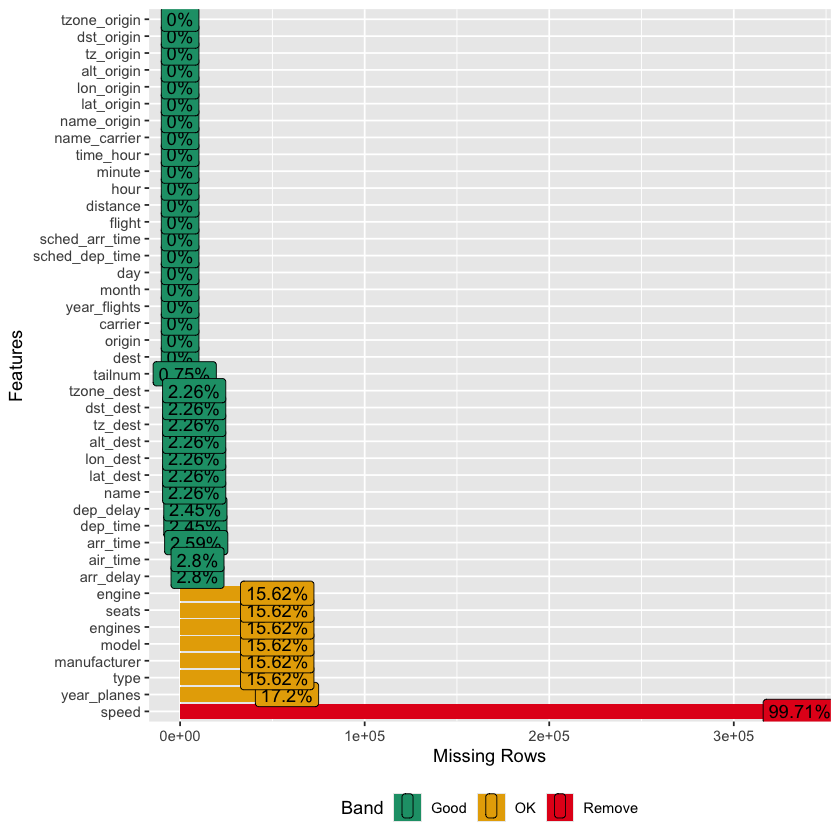

In [15]:
plot_missing(final_data) 

In [16]:
final_data <- drop_columns(final_data, "speed") 

# 分布

## 柱状图

5 columns ignored with more than 50 categories.
dest: 105 categories
tailnum: 4044 categories
time_hour: 6936 categories
model: 128 categories
name: 102 categories




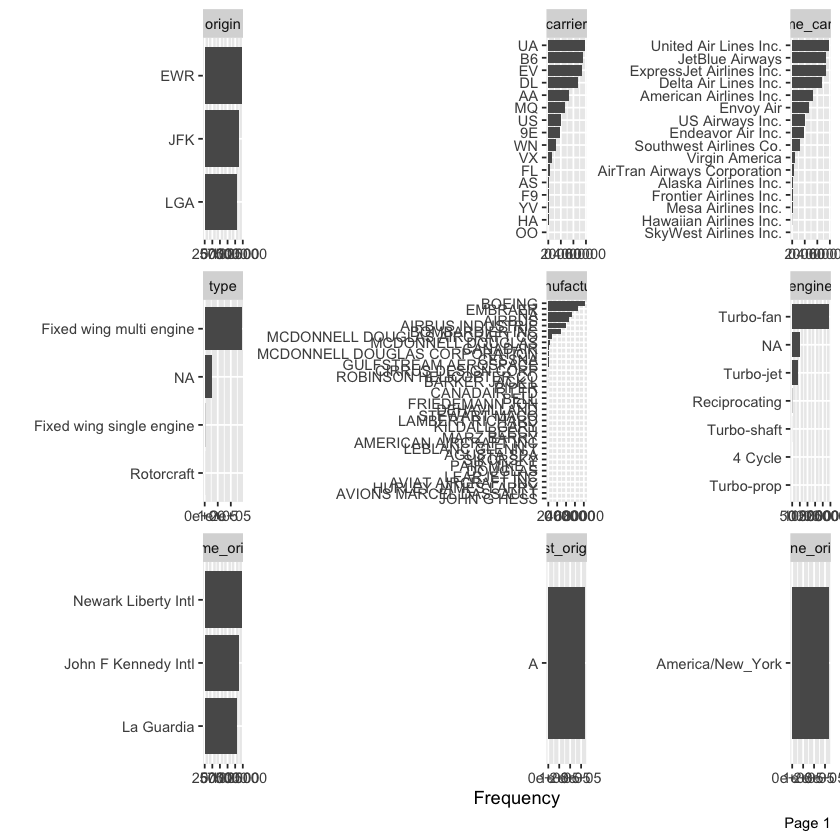

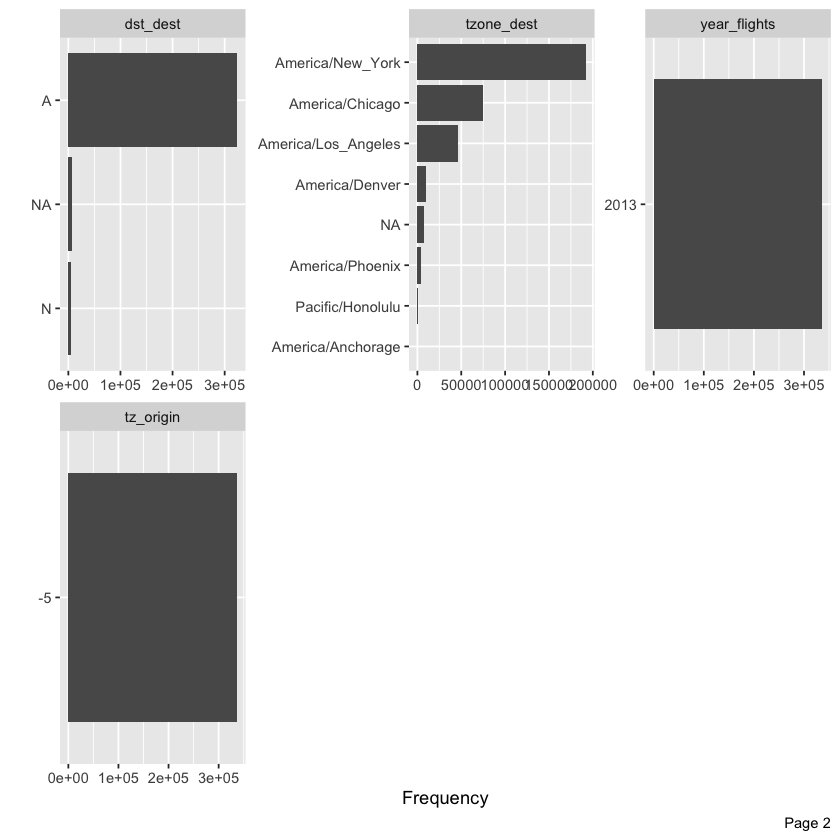

In [17]:
plot_bar(final_data)

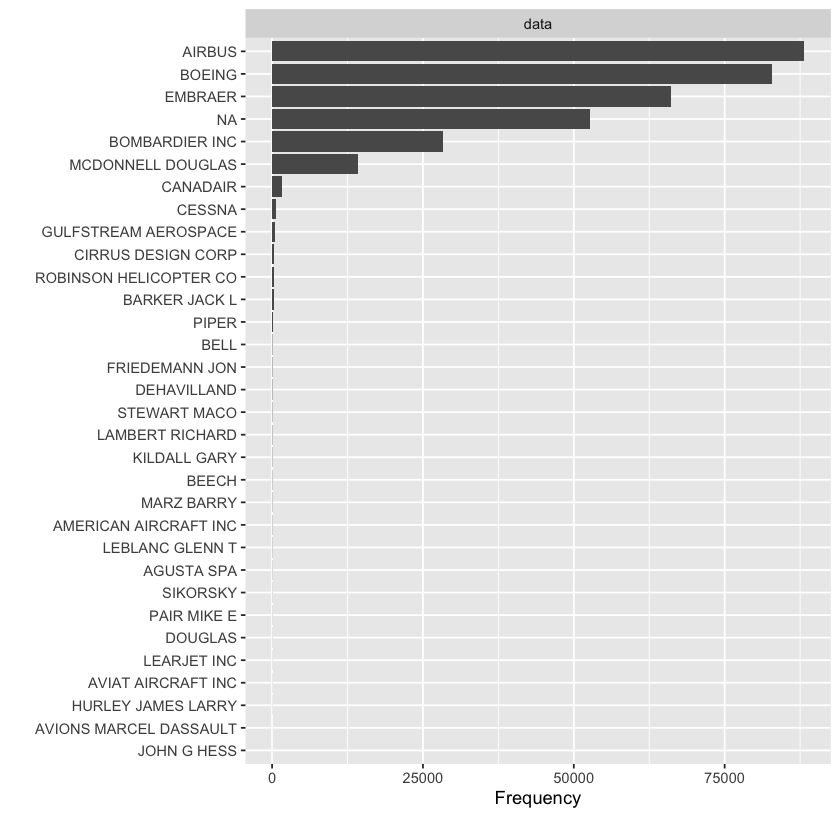

In [24]:
library(dplyr)

final_data <- final_data %>%
  mutate(manufacturer = recode(
    manufacturer,
    "AIRBUS INDUSTRIE" = "AIRBUS",
    "CANADAIR LTD" = "CANADAIR",
    "MCDONNELL DOUGLAS AIRCRAFT CO" = "MCDONNELL DOUGLAS",
    "MCDONNELL DOUGLAS CORPORATION" = "MCDONNELL DOUGLAS"
  ))

plot_bar(final_data$manufacturer)

In [27]:
final_data <- drop_columns(
  final_data,
  c("dst_origin", "tzone_origin", "year_flights", "tz_origin")
)

Warning message in `[.data.table`(data, , `:=`((ind), NULL)):
"Tried to assign NULL to column 'dst_origin', but this column does not exist to remove"
Warning message in `[.data.table`(data, , `:=`((ind), NULL)):
"Tried to assign NULL to column 'tzone_origin', but this column does not exist to remove"
Warning message in `[.data.table`(data, , `:=`((ind), NULL)):
"Tried to assign NULL to column 'year_flights', but this column does not exist to remove"
Warning message in `[.data.table`(data, , `:=`((ind), NULL)):
"Tried to assign NULL to column 'tz_origin', but this column does not exist to remove"


5 columns ignored with more than 50 categories.
dest: 105 categories
tailnum: 4044 categories
time_hour: 6936 categories
model: 128 categories
name: 102 categories




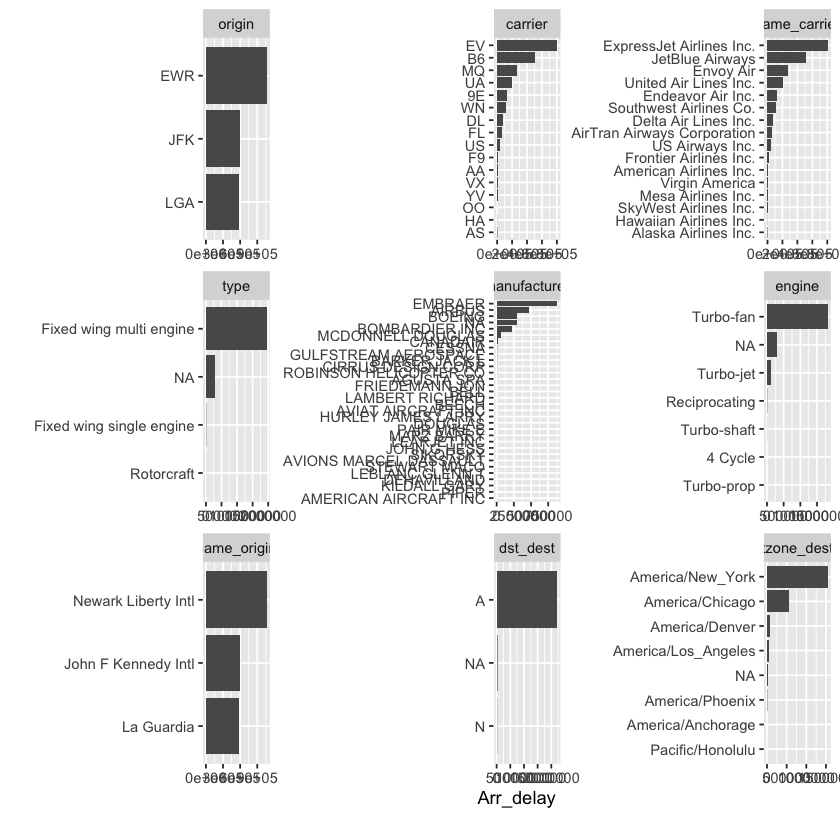

In [28]:
plot_bar(final_data, with = "arr_delay")

5 columns ignored with more than 50 categories.
dest: 105 categories
tailnum: 4044 categories
time_hour: 6936 categories
model: 128 categories
name: 102 categories




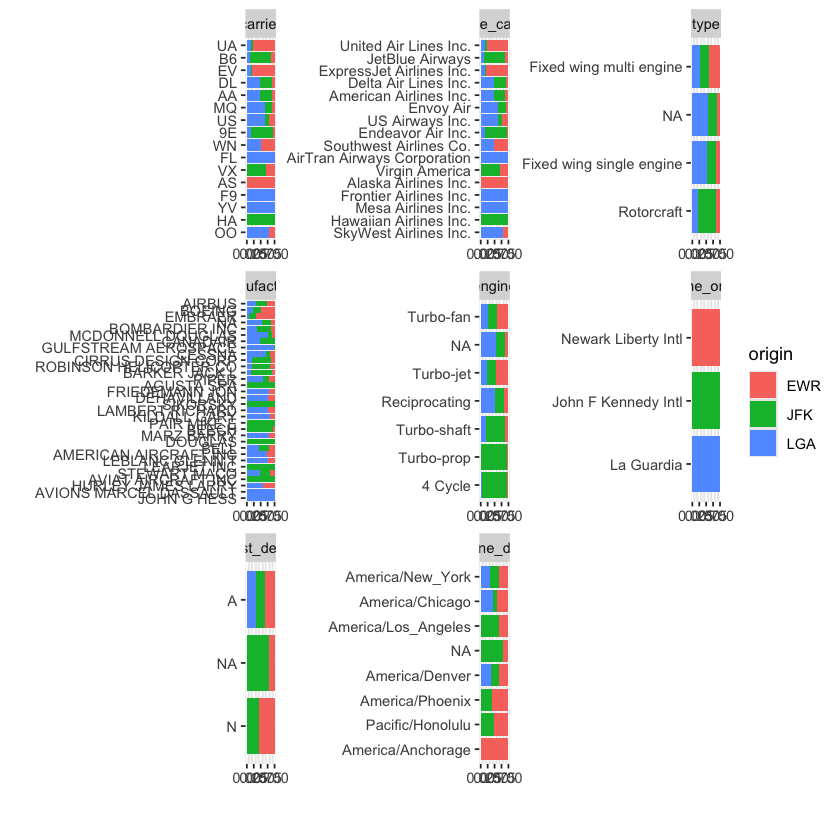

In [ ]:
plot_bar(final_data, by = "origin")

## 条形图

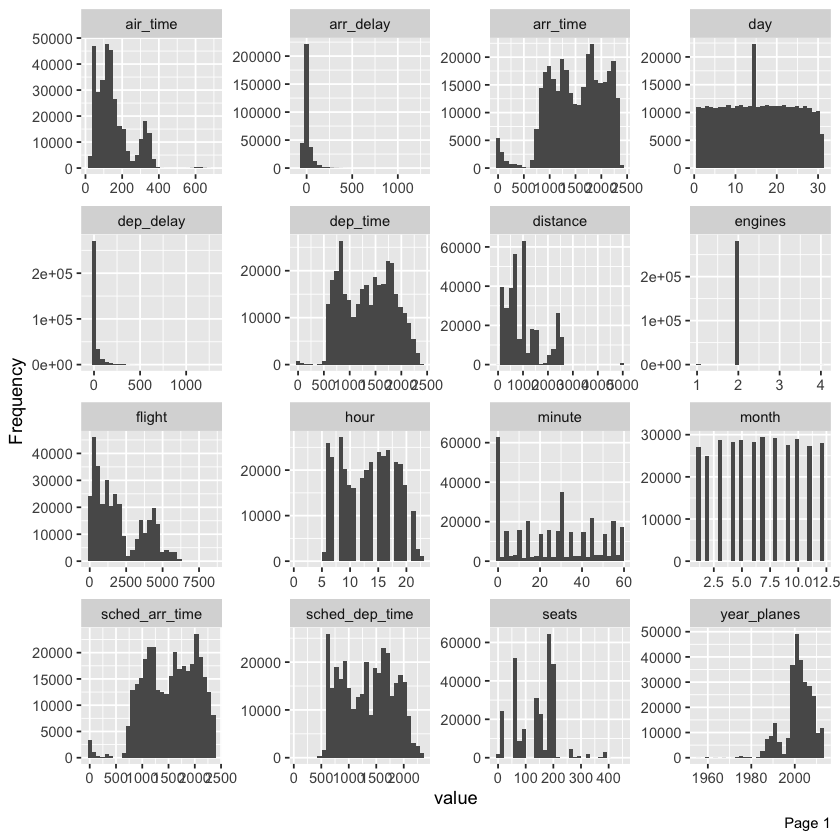

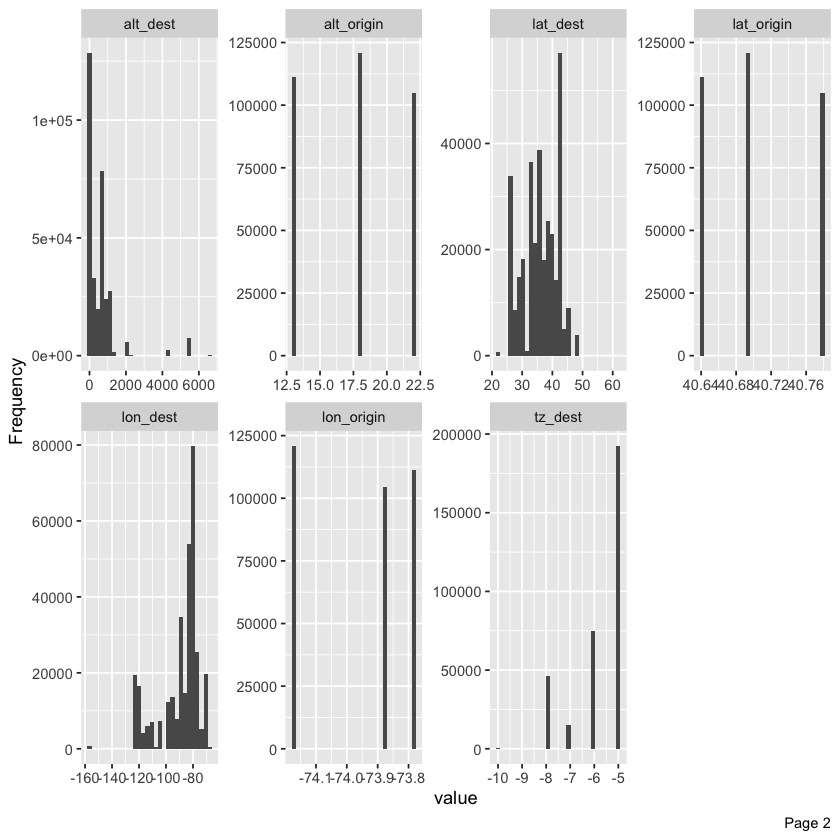

In [30]:
plot_histogram(final_data) 

# QQ图

Warning message:
"Removed 221 rows containing non-finite outside the scale range (`stat_qq()`)."
Warning message:
"Removed 221 rows containing non-finite outside the scale range
(`stat_qq_line()`)."


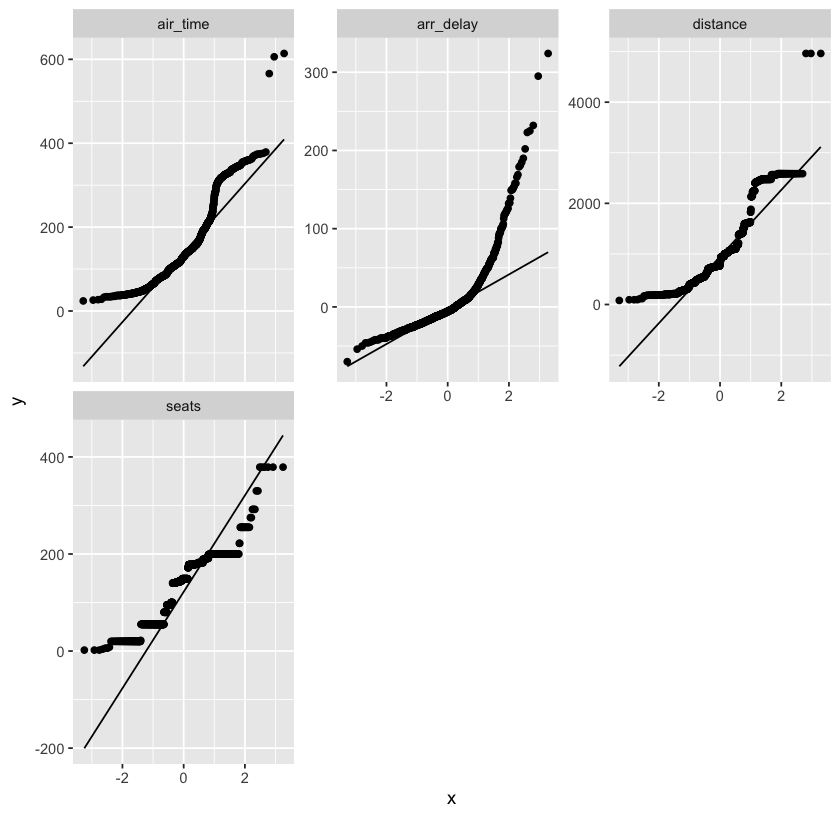

In [31]:
qq_data <- final_data[, c("arr_delay", "air_time", "distance", "seats")]

plot_qq(qq_data, sampled_rows = 1000L) 

Warning message:
"Removed 162 rows containing non-finite outside the scale range (`stat_qq()`)."
Warning message:
"Removed 162 rows containing non-finite outside the scale range
(`stat_qq_line()`)."


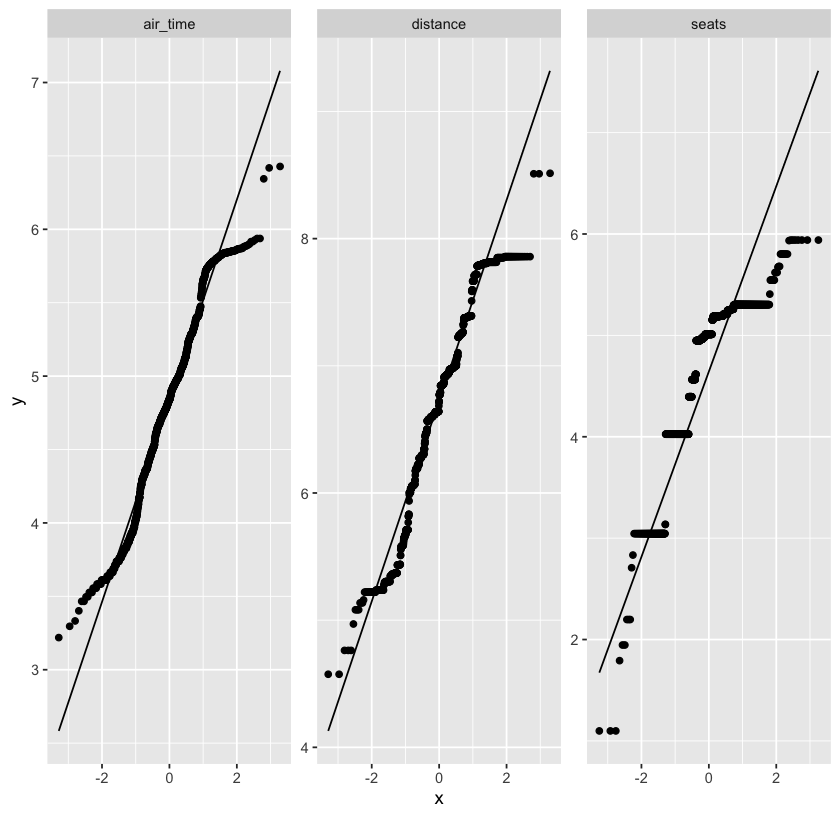

In [32]:
log_qq_data <- update_columns(qq_data, 2:4, function(x) log(x + 1))

plot_qq(log_qq_data[, 2:4], sampled_rows = 1000L) 

Warning message:
"Removed 209 rows containing non-finite outside the scale range (`stat_qq()`)."
Warning message:
"Removed 209 rows containing non-finite outside the scale range
(`stat_qq_line()`)."


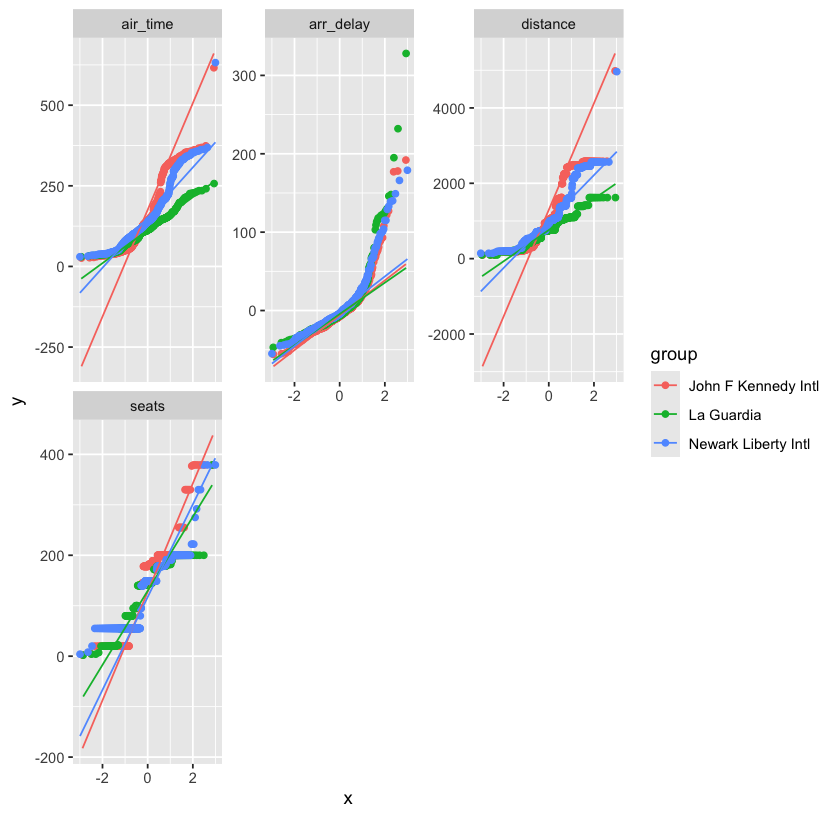

In [33]:
qq_data <- final_data[, c("name_origin", "arr_delay", "air_time", "distance", "seats")]

plot_qq(qq_data, by = "name_origin", sampled_rows = 1000L)

# 特征工程

Column [dep_time]: Set 8255 missing values to 0

Column [dep_delay]: Set 8255 missing values to 0

Column [arr_time]: Set 8713 missing values to 0

Column [arr_delay]: Set 9430 missing values to 0

Column [air_time]: Set 9430 missing values to 0

Column [year_planes]: Set 57912 missing values to 0

Column [engines]: Set 52606 missing values to 0

Column [seats]: Set 52606 missing values to 0

Column [lat_dest]: Set 7602 missing values to 0

Column [lon_dest]: Set 7602 missing values to 0

Column [alt_dest]: Set 7602 missing values to 0

Column [tz_dest]: Set 7602 missing values to 0

Column [tailnum]: Set 2512 missing values to unknown

Column [type]: Set 52606 missing values to unknown

Column [manufacturer]: Set 52606 missing values to unknown

Column [model]: Set 52606 missing values to unknown

Column [engine]: Set 52606 missing values to unknown

Column [name]: Set 7602 missing values to unknown

Column [dst_dest]: Set 7602 missing values to unknown

Column [tzone_dest]: Set 7602 

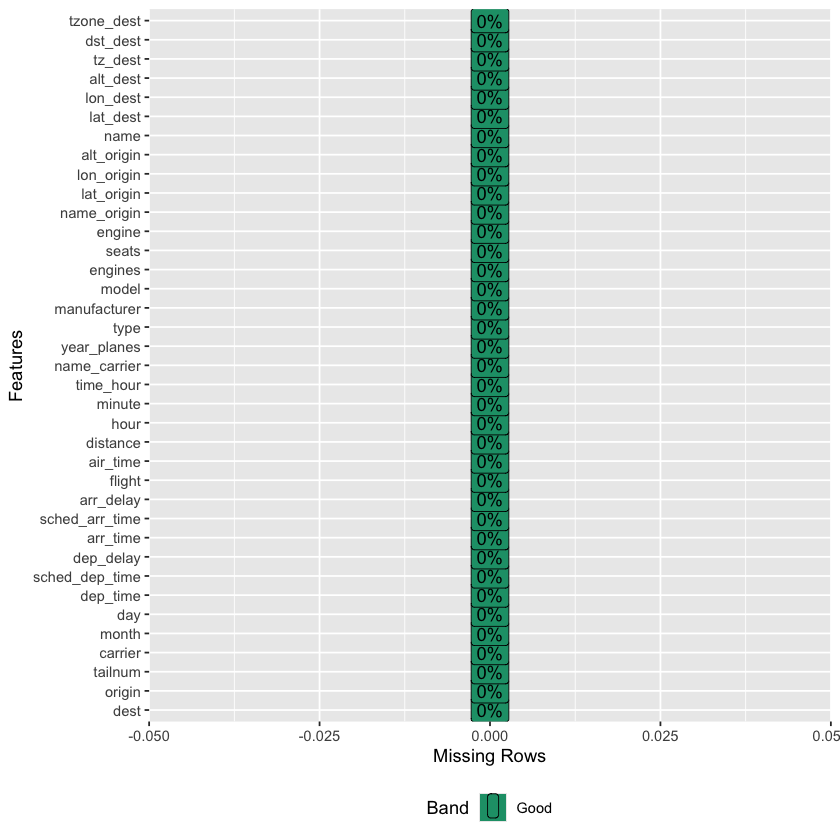

In [34]:
final_df <- set_missing(final_data, list(0L, "unknown"))
plot_missing(final_df)

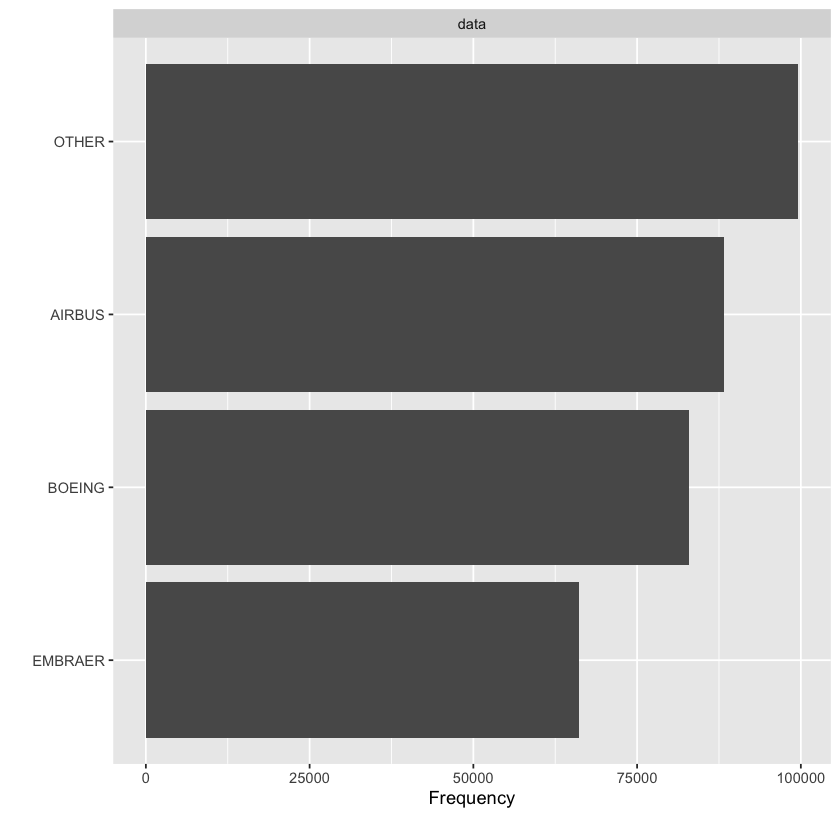

In [35]:
final_df <- group_category(data = final_data, feature = "manufacturer", threshold = 0.2, update = TRUE)
plot_bar(final_df$manufacturer)

In [36]:
group_category(data = final_data, feature = "name_carrier", threshold = 0.2, measure = "distance")   

name_carrier,cnt,pct,cum_pct
<chr>,<dbl>,<dbl>,<dbl>
United Air Lines Inc.,89705524,0.2561422,0.2561422
Delta Air Lines Inc.,59507317,0.1699153,0.4260575
JetBlue Airways,58384137,0.1667082,0.5927657
American Airlines Inc.,43864584,0.1252495,0.7180152


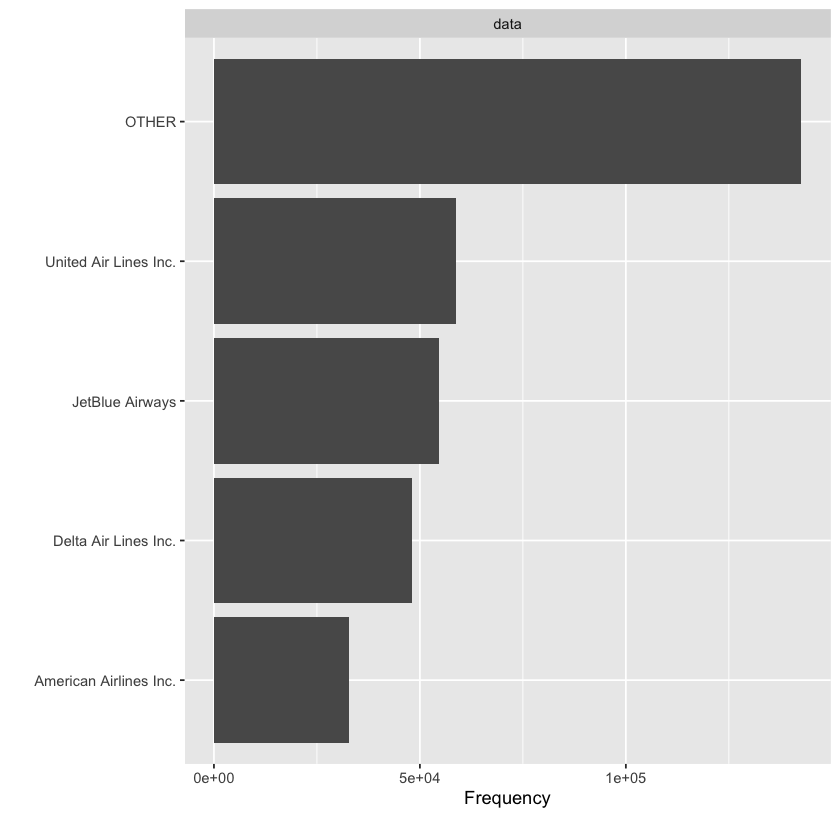

In [37]:
final_df <- group_category(data = final_data, feature = "name_carrier", threshold = 0.2, measure = "distance", update = TRUE)
plot_bar(final_df$name_carrier)

In [38]:
plot_str(
  list(
    "original" = final_data,
    "dummified" = dummify(final_data, maxcat = 5L)
  )
) 

10 features with more than 5 categories ignored!
dest: 105 categories
tailnum: 4044 categories
carrier: 16 categories
time_hour: 6936 categories
name_carrier: 16 categories
manufacturer: 32 categories
model: 128 categories
engine: 7 categories
name: 102 categories
tzone_dest: 8 categories




'data.frame':	336776 obs. of  5 variables:
 $ month  : Factor w/ 12 levels "1","2","3","4",..: 5 10 12 5 12 8 7 7 5 8 ...
 $ day    : Factor w/ 31 levels "1","2","3","4",..: 14 29 19 30 7 25 12 1 15 26 ...
 $ hour   : Factor w/ 20 levels "1","5","6","7",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ minute : Factor w/ 60 levels "0","1","2","3",..: 2 1 2 2 2 8 8 8 2 8 ...
 $ tz_dest: Factor w/ 6 levels "-10","-9","-8",..: 4 4 4 4 4 4 4 4 4 4 ...


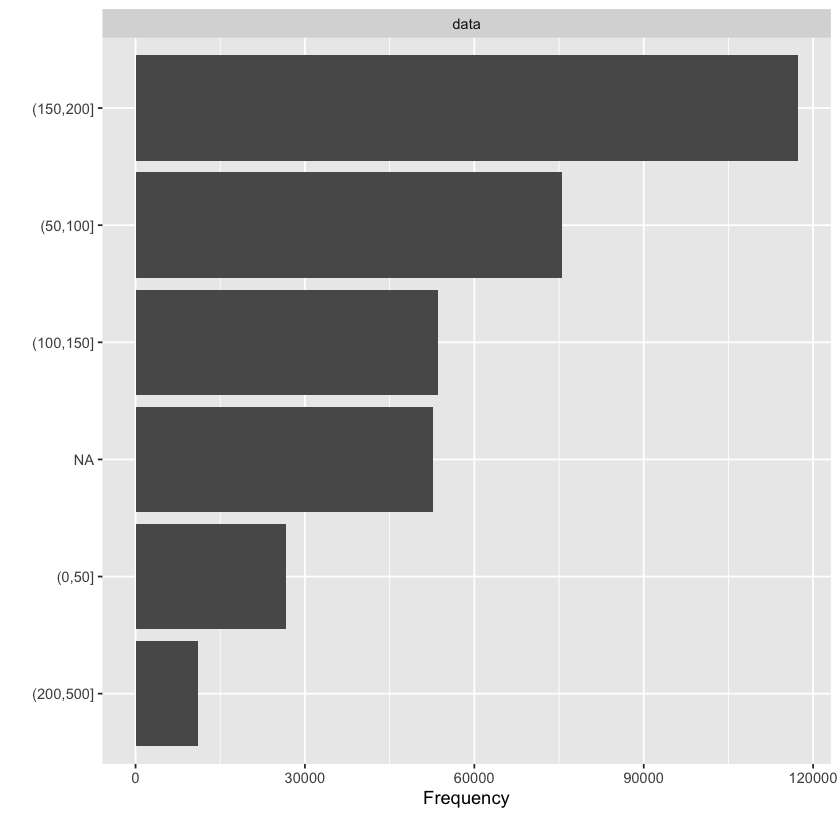

In [39]:
temporal_features <- c("month", "day", "hour", "minute", "tz_dest")
final_data <- update_columns(final_data, temporal_features, as.factor)
str(final_data[, c("month", "day", "hour", "minute", "tz_dest")])
bin_seat <- function(x) cut(x, breaks = c(0L, 50L, 100L, 150L, 200L, 500L))
transformed_data <- update_columns(final_data, "seats", bin_seat)

plot_bar(transformed_data$seats)  